Dataset shape: (15972, 23)

First few rows:
   FRUITS_VEGGIES DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0               3            2               2            5   
1               2            3               4            3   
2               2            3               3            4   
3               3            3              10            3   
4               5            1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  \
0                  0               5            2         0          1   
1                  8              10            5         2          2   
2                  4              10            3         2          2   
3                 10               7            2         5          2   
4                 10               4            2         4          2   

   TODO_COMPLETED  ...  SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  \
0               6  ...            7              5            

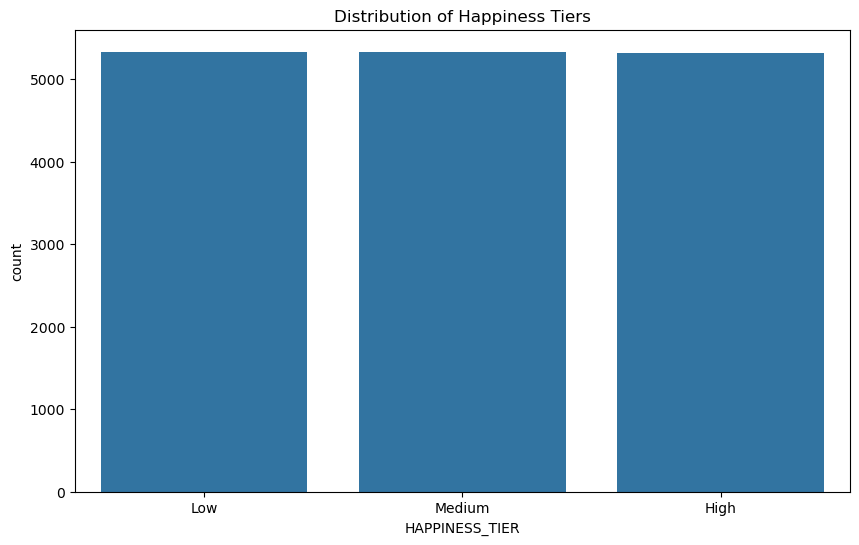


Feature data types:
FRUITS_VEGGIES       int64
PLACES_VISITED       int64
CORE_CIRCLE          int64
SUPPORTING_OTHERS    int64
SOCIAL_NETWORK       int64
ACHIEVEMENT          int64
DONATION             int64
TODO_COMPLETED       int64
FLOW                 int64
DAILY_STEPS          int64
LIVE_VISION          int64
SLEEP_HOURS          int64
LOST_VACATION        int64
DAILY_SHOUTING       int64
SUFFICIENT_INCOME    int64
PERSONAL_AWARDS      int64
TIME_FOR_PASSION     int64
WEEKLY_MEDITATION    int64
BMI_RANGE_2           bool
dtype: object

Model Evaluation:
Accuracy: 0.9522

Classification Report:


C:\Users\becky\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        High       0.97      0.96      0.96      1593
         Low       0.96      0.96      0.96      1600
      Medium       0.93      0.93      0.93      1599

    accuracy                           0.95      4792
   macro avg       0.95      0.95      0.95      4792
weighted avg       0.95      0.95      0.95      4792


Confusion Matrix:
[[1530    0   63]
 [   0 1544   56]
 [  52   58 1489]]

Top 10 features for high happiness prediction:
              Feature  Importance_High
0      FRUITS_VEGGIES        -0.064112
13     DAILY_SHOUTING         0.055789
9         DAILY_STEPS         0.052974
8                FLOW        -0.048976
2         CORE_CIRCLE         0.048461
3   SUPPORTING_OTHERS        -0.047201
15    PERSONAL_AWARDS        -0.042881
4      SOCIAL_NETWORK         0.040786
12      LOST_VACATION         0.036059
5         ACHIEVEMENT         0.034246


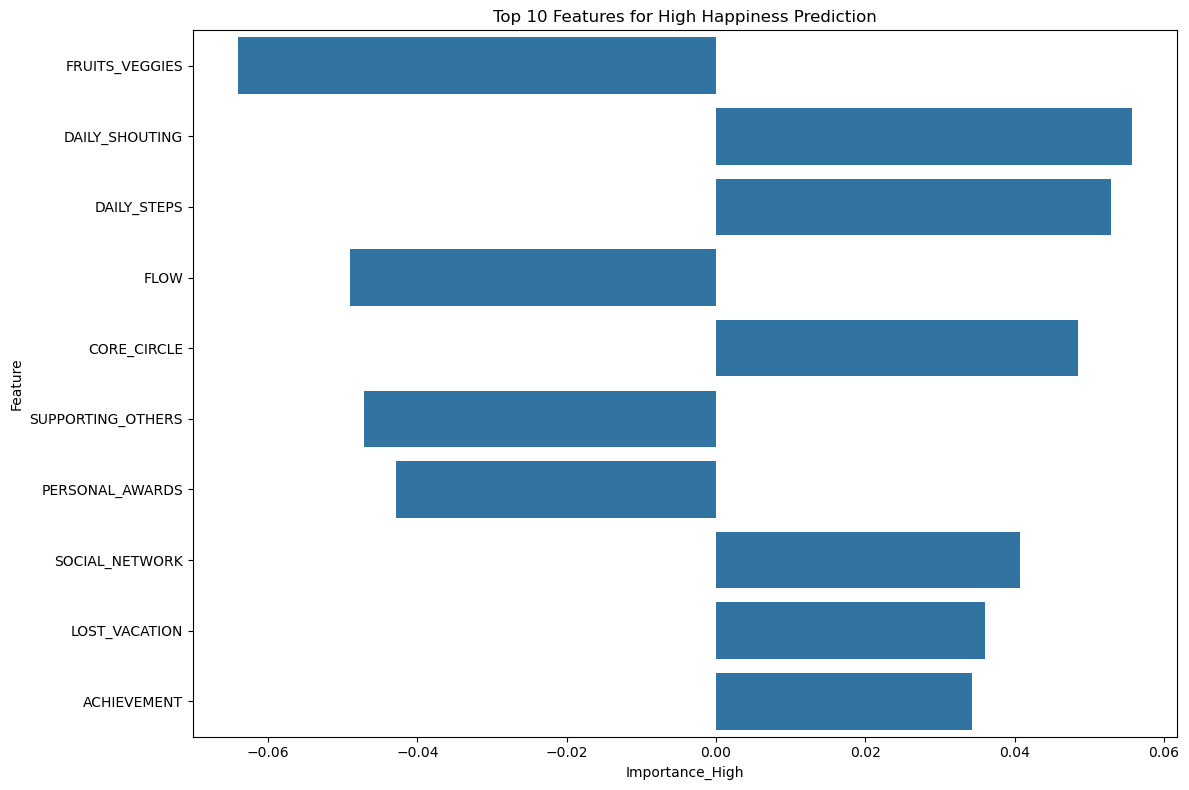

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Create a happiness tier column based on WORK_LIFE_BALANCE_SCORE
# Assuming WORK_LIFE_BALANCE_SCORE is a good proxy for happiness
df['HAPPINESS_TIER'] = pd.qcut(df['WORK_LIFE_BALANCE_SCORE'], 
                              q=3, 
                              labels=['Low', 'Medium', 'High'])

# Visualize the distribution of happiness tiers
plt.figure(figsize=(10, 6))
sns.countplot(x='HAPPINESS_TIER', data=df)
plt.title('Distribution of Happiness Tiers')
plt.show()

# Define the features to use (all columns except target, and the column used to create the target)
features = df.drop([ 'HAPPINESS_TIER', 'WORK_LIFE_BALANCE_SCORE'], axis=1)


#First, identify and drop the date column
# Assuming the date column is causing the error
features = features.select_dtypes(exclude=['object'])  

# Handle categorical features
# Convert categorical columns to dummy variables
categorical_cols = ['GENDER', 'BMI_RANGE']  
categorical_cols = [col for col in categorical_cols if col in features.columns]
if categorical_cols:  
    features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)


# Print feature data types
print("\nFeature data types:")
print(features.dtypes)

# Split the data into training and testing sets
X = features
y = df['HAPPINESS_TIER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
coefficients = pipeline.named_steps['classifier'].coef_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Low': coefficients[0],
    'Importance_Medium': coefficients[1],
    'Importance_High': coefficients[2]
})

# Sort by absolute importance for high happiness
feature_importance['Abs_Importance_High'] = abs(feature_importance['Importance_High'])
feature_importance = feature_importance.sort_values('Abs_Importance_High', ascending=False)

print("\nTop 10 features for high happiness prediction:")
print(feature_importance[['Feature', 'Importance_High']].head(10))

# Visualize feature importance for high happiness
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance_High', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features for High Happiness Prediction')
plt.tight_layout()
plt.show()


Feature data types:
FRUITS_VEGGIES               int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
WORK_LIFE_BALANCE_SCORE    float64
BMI_RANGE_2                   bool
dtype: object

Decision Tree Model Evaluation:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1593
         Low       1.00      1.00      1.00      1600
      Medium       1.00     

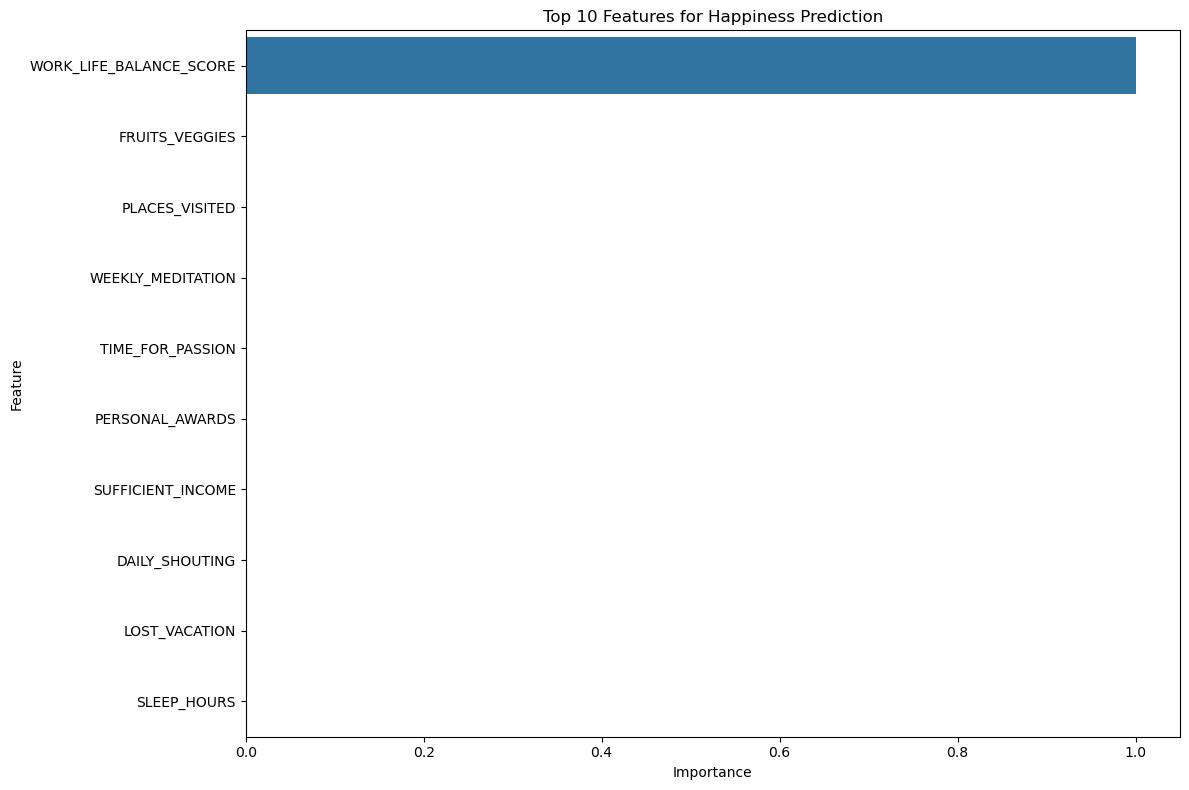

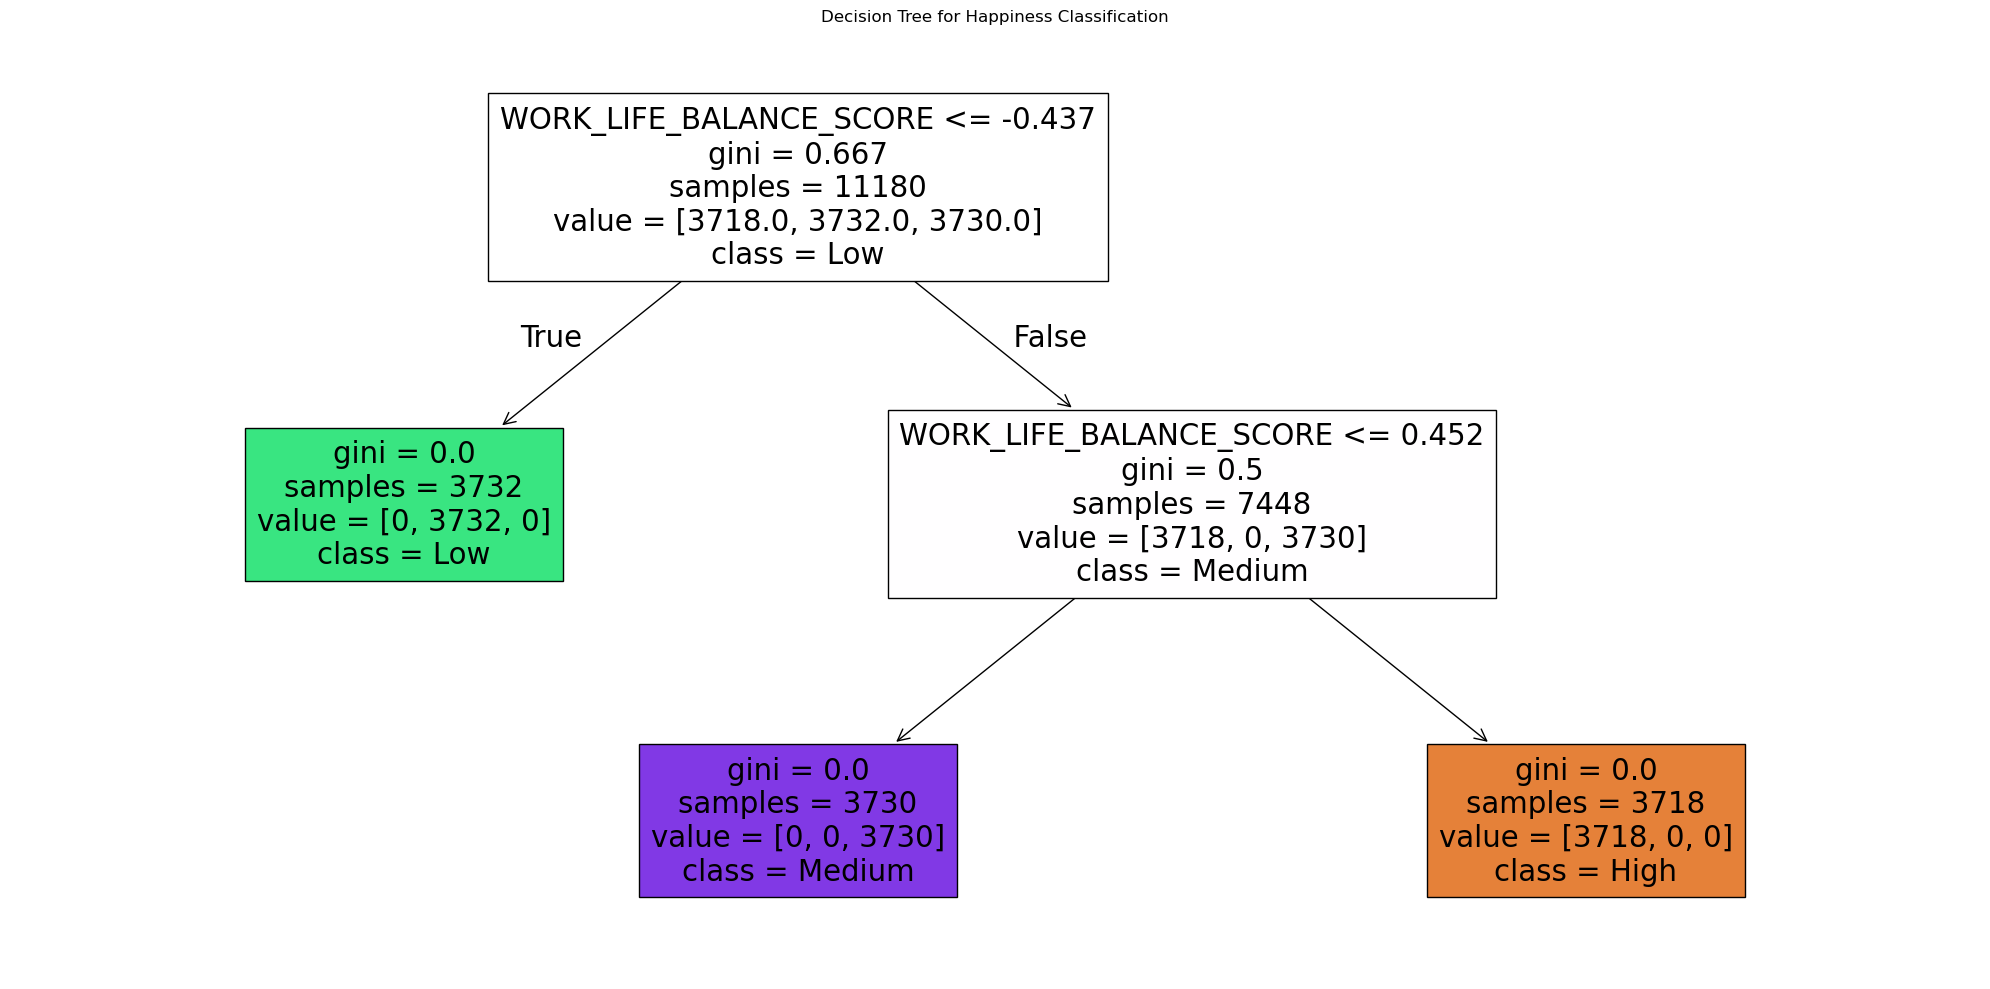


Best parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Best Decision Tree Model Evaluation:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1593
         Low       1.00      1.00      1.00      1600
      Medium       1.00      1.00      1.00      1599

    accuracy                           1.00      4792
   macro avg       1.00      1.00      1.00      4792
weighted avg       1.00      1.00      1.00      4792



In [13]:
#Decision Tree
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import tree


# Pprepare the features by dropping non-numeric columns and the target
features = df.drop('HAPPINESS_TIER', axis=1)

# Drop any date columns or non-numeric columns that can't be used in the model
features = features.select_dtypes(exclude=['object', 'datetime64'])

# Handle categorical features if any remain (that are encoded as integers)
categorical_cols = ['GENDER', 'BMI_RANGE']  # Adjust based on your actual categorical columns
categorical_cols = [col for col in categorical_cols if col in features.columns]
if categorical_cols:
    features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Print feature data types to verify
print("\nFeature data types:")
print(features.dtypes)

# Split the data into training and testing sets
X = features
y = df['HAPPINESS_TIER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a pipeline with preprocessing and decision tree model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision tree classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pipeline.named_steps['classifier'].feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 important features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features for Happiness Prediction')
plt.tight_layout()
plt.show()

# Visualize the decision tree (limited to depth=3 for clarity)
plt.figure(figsize=(20, 10))
tree_model = pipeline.named_steps['classifier']
tree.plot_tree(tree_model, 
               feature_names=X.columns, 
               class_names=sorted(y.unique()), 
               filled=True, 
               max_depth=3)
plt.title('Decision Tree for Happiness Classification')
plt.tight_layout()
plt.show()

# If you want to tune the decision tree parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("\nBest parameters:", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nBest Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Feature data types:
FRUITS_VEGGIES               int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
WORK_LIFE_BALANCE_SCORE    float64
BMI_RANGE_2                   bool
dtype: object
Training SVM model...

SVM Model Evaluation:
Accuracy: 0.9587

Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.96      0.97      1593
         Low       0.96      0.97      0.97      1600
      Medium    

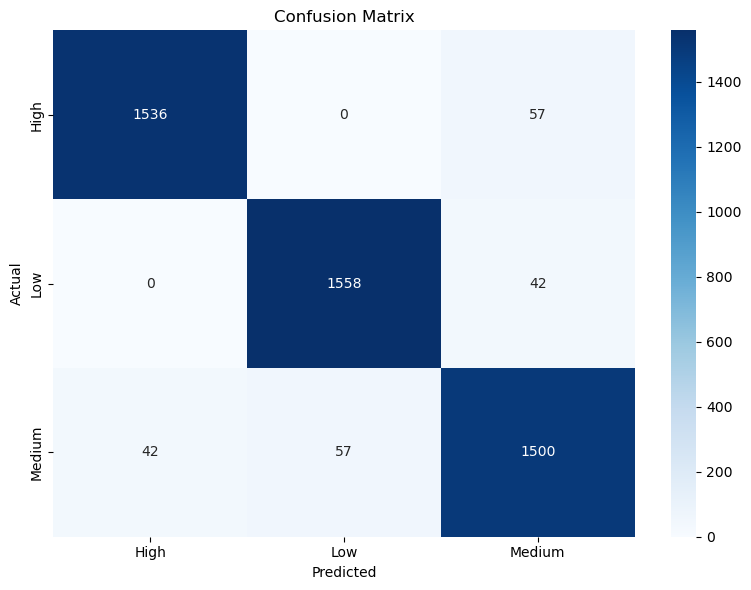


Performing hyperparameter tuning...

Best parameters: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}

Best SVM Model Evaluation:
Accuracy: 0.9990

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1593
         Low       1.00      1.00      1.00      1600
      Medium       1.00      1.00      1.00      1599

    accuracy                           1.00      4792
   macro avg       1.00      1.00      1.00      4792
weighted avg       1.00      1.00      1.00      4792


SVM with PCA Model Evaluation:
Accuracy: 0.9437

Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.95      0.96      1593
         Low       0.95      0.96      0.96      1600
      Medium       0.91      0.92      0.92      1599

    accuracy                           0.94      4792
   macro avg       0.94      0.94      0.94      4792
weighted av

In [15]:
# Support Ventor Machines (SVM)
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


# Prepare the features by dropping non-numeric columns and the target
features = df.drop('HAPPINESS_TIER', axis=1)

# Drop any date columns or non-numeric columns that can't be used in the model
features = features.select_dtypes(exclude=['object', 'datetime64'])

# Handle categorical features if any remain (that are encoded as integers)
categorical_cols = ['GENDER', 'BMI_RANGE']  # Adjust based on your actual categorical columns
categorical_cols = [col for col in categorical_cols if col in features.columns]
if categorical_cols:
    features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Print feature data types to verify
print("\nFeature data types:")
print(features.dtypes)

# Split the data into training and testing sets
X = features
y = df['HAPPINESS_TIER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a pipeline with preprocessing and SVM model
# Note: SVM can be computationally expensive for large datasets
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization is crucial for SVM
    ('classifier', SVC(random_state=42, probability=True))  # SVM classifier
])

# Train the model
print("Training SVM model...")
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("\nSVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Hyperparameter tuning with GridSearchCV
print("\nPerforming hyperparameter tuning...")
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
    'classifier__kernel': ['rbf', 'linear']
}

# For large datasets, you might want to use a smaller subset for tuning
# or use RandomizedSearchCV instead
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("\nBest parameters:", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nBest SVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


from sklearn.decomposition import PCA

# PCA before SVM
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
    ('classifier', SVC(kernel='rbf', C=grid_search.best_params_['classifier__C'], 
                      gamma=grid_search.best_params_['classifier__gamma'], 
                      random_state=42))
])

pca_pipeline.fit(X_train, y_train)
y_pred_pca = pca_pipeline.predict(X_test)

print("\nSVM with PCA Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))


if 'pca' in pca_pipeline.named_steps:
    pca = pca_pipeline.named_steps['pca']
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
    most_important_names = [X.columns[most_important[i]] for i in range(pca.n_components_)]
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(pca.n_components_)}
    
    print("\nMost important feature for each principal component:")
    for pc, feature in dic.items():
        print(f"{pc}: {feature}")